# Interpolate Trace of Inverse

 This interactive tutorial demonstrates the usage of [`TraceInv.InterpolateTraceOfInverse`](https://ameli.github.io/TraceInv/InterpolateTraceOfInverse.html) module and comparison of the methods therein.
    


## Ploting Results

Before we begin, in the code below we define a function to plot results that comes after. You may skip the code below for a moment.

In [7]:
# Import packages
import numpy
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

def Plot(
        InterpolantPoints,
        InquiryPoints,
        Trace_Exact_InterpolantPoints,
        Trace_Exact_InquiryPoints,
        Trace_Interpolated_InquiryPoints):

    # Plot results
    fig,ax = plt.subplots(ncols=2,figsize=(9,4))
    ax[0].semilogx(InterpolantPoints,Trace_Exact_InterpolantPoints,'o',color='red',label='Interpolant points')
    ax[0].semilogx(InquiryPoints,Trace_Exact_InquiryPoints,color='red',label='Exact')
    ax[0].semilogx(InquiryPoints,Trace_Interpolated_InquiryPoints,color='black',label='Interpolated')
    ax[0].grid(True)
    ax[0].set_xlim([InquiryPoints[0],InquiryPoints[-1]])
    ax[0].set_xlabel('$t$')
    ax[0].set_ylabel('$trace(A + t I)^{-1}$')
    ax[0].set_title('Trace of Inverse')
    ax[0].legend()

    # Plot relative error in percent
    Error = 100*(Trace_Interpolated_InquiryPoints - Trace_Exact_InquiryPoints) / Trace_Exact_InquiryPoints
    ax[1].semilogx(InquiryPoints,Error,color='black',label='Interpolated')
    ax[1].semilogx(InterpolantPoints,numpy.zeros(len(InterpolantPoints)),'o',color='red',label='Interpolant points')
    ax[1].grid(True)
    ax[1].set_xlim([InquiryPoints[0],InquiryPoints[-1]])
    ax[1].set_xlabel('$t$')
    ax[1].set_ylabel('Relative Error (in Percent)')
    ax[1].set_title('Relative Error')
    ax[1].yaxis.set_major_formatter(mtick.PercentFormatter())
    ax[1].legend()

    plt.tight_layout()
    plt.show()

## Generate Sample Matrix

We generate sample matrices using [`TraceInv.GenerateMatrix`](https://ameli.github.io/TraceInv/GenerateMatrix.html). In the following, we create a symmmetric and positive-definite matrix of the size $(20^2,20^2)$.

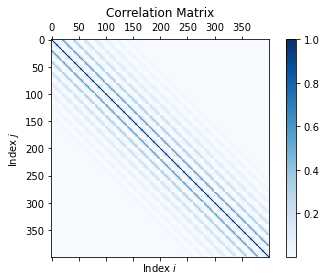

In [1]:
from TraceInv import GenerateMatrix

# Generate a symmetric and positive-definite matrices
A = GenerateMatrix(NumPoints=20,Plot=True)

## Compute Trace without Interpolation



In [3]:
import numpy
from TraceInv import InterpolateTraceOfInverse

# Specify interpolation points and the inquiry point
# InterpolantPoints = [1e-3,1e-2,1e-1,1,1e+1,1e+2]
InterpolantPoints = [1e-1,1,1e+1,1e+2]
InquiryPoints = numpy.logspace(-5,5,100)

# Create interpolation object with exact method, then compute exact values of trace
TI_EXT = InterpolateTraceOfInverse(A,InterpolationMethod='EXT')
Trace_Exact_InquiryPoints = TI_EXT.Interpolate(InquiryPoints)
Trace_Exact_InterpolantPoints = TI_EXT.Interpolate(InterpolantPoints)

# Interpolate Trace

### Using Root Monomial Basis Functions Method



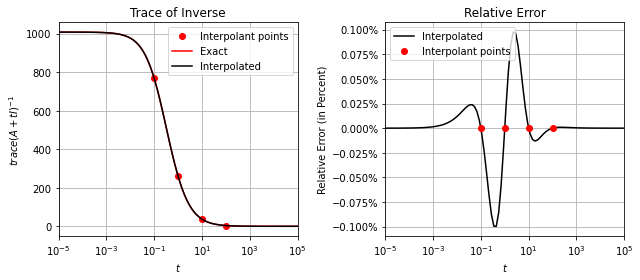

In [8]:
# Create interpolation object with RMBF method, then interpolate array t
TI_RMBF = InterpolateTraceOfInverse(A,InterpolationMethod='RMBF',InterpolantPoints=InterpolantPoints)
# TI_RMBF = InterpolateTraceOfInverse(A,InterpolationMethod='RBF',InterpolantPoints=InterpolantPoints)
TI_RMBF = InterpolateTraceOfInverse(A,InterpolationMethod='RPF',InterpolantPoints=InterpolantPoints)
Trace_RMBF_InquiryPoints = TI_RMBF.Interpolate(InquiryPoints)

Plot(
    InterpolantPoints,
    InquiryPoints,
    Trace_Exact_InterpolantPoints,
    Trace_Exact_InquiryPoints,
    Trace_RMBF_InquiryPoints)

### Using Rational Polynomial Functions Method